In [65]:
from SEIRNetwork import SEIRNetwork 
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from random import choices
from collections import Counter,OrderedDict

In [7]:
TOTAL_POPULATION = 	10000
AVG_NODE_DEGREE = 10
G = nx.barabasi_albert_graph(TOTAL_POPULATION,AVG_NODE_DEGREE)

In [6]:
age_group_sheet_url = "https://docs.google.com/spreadsheets/d/1tR9sUXHZkbgYzPYu48zS5TdSQPmlTYqAw8xBwhnQwMM/edit#gid=0".replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(age_group_sheet_url)
df['population_pct'] = df['population']/sum(df['population'])
AGE_GROUP_PCT ={}
AGE_GROUP_PCT['0_9'] = (
    float(df[df['age_group']=='0-4'].population_pct)+
    float(df[df['age_group']=='5-9'].population_pct)
    )
AGE_GROUP_PCT['10_19'] = (
    float(df[df['age_group']=='10-14'].population_pct)+
    float(df[df['age_group']=='15-19'].population_pct)
    )
AGE_GROUP_PCT['20_64'] = (
    float(df[df['age_group']=='20-24'].population_pct)+
    float(df[df['age_group']=='25-29'].population_pct)+
    float(df[df['age_group']=='30-34'].population_pct)+
    float(df[df['age_group']=='35-39'].population_pct)+
    float(df[df['age_group']=='40-44'].population_pct)+
    float(df[df['age_group']=='45-49'].population_pct)+
    float(df[df['age_group']=='50-54'].population_pct)+
    float(df[df['age_group']=='55-59'].population_pct)+
    float(df[df['age_group']=='60-64'].population_pct)
    )
AGE_GROUP_PCT['65_over'] = (
    float(df[df['age_group']=='65-69'].population_pct)+
    float(df[df['age_group']=='70-74'].population_pct)+
    float(df[df['age_group']=='75-79'].population_pct)+
    float(df[df['age_group']=='80-84'].population_pct)+
    float(df[df['age_group']=='85-89'].population_pct)+
    float(df[df['age_group']=='90'].population_pct)
    )

In [34]:
AGE_GROUP_PCT

{'0_9': 0.09461079646639209,
 '10_19': 0.10155862006691983,
 '20_64': 0.6435490586576905,
 '65_over': 0.16028152480899757}

In [42]:
for node_id in range(TOTAL_POPULATION):
    G.nodes[node_id]["age_grp"] = choices(list(AGE_GROUP_PCT.keys()),list(AGE_GROUP_PCT.values()),k=1)[-1]

In [8]:
node_id = 0
color_list = {
    "0_9":'y',
    "10_19":'g',
    "20_64":'b',
    "65_over":'c'
}
for i,age_grp in enumerate(AGE_GROUP_PCT):
    
    for _ in range(round(TOTAL_POPULATION*AGE_GROUP_PCT[age_grp])):
        if node_id not in G.nodes:
            continue
        G.nodes[node_id]["age_grp"] = age_grp
        G.nodes[node_id]["color"] = color_list[age_grp]
        node_id+=1

In [43]:
get_age_group = nx.get_node_attributes(G, "age_grp")

In [44]:
get_age_group

{0: '0_9',
 1: '20_64',
 2: '10_19',
 3: '20_64',
 4: '20_64',
 5: '20_64',
 6: '20_64',
 7: '10_19',
 8: '10_19',
 9: '10_19',
 10: '65_over',
 11: '20_64',
 12: '65_over',
 13: '20_64',
 14: '20_64',
 15: '20_64',
 16: '10_19',
 17: '20_64',
 18: '20_64',
 19: '20_64',
 20: '20_64',
 21: '20_64',
 22: '20_64',
 23: '20_64',
 24: '20_64',
 25: '20_64',
 26: '0_9',
 27: '65_over',
 28: '10_19',
 29: '20_64',
 30: '20_64',
 31: '65_over',
 32: '20_64',
 33: '0_9',
 34: '65_over',
 35: '10_19',
 36: '20_64',
 37: '20_64',
 38: '20_64',
 39: '20_64',
 40: '20_64',
 41: '10_19',
 42: '20_64',
 43: '65_over',
 44: '20_64',
 45: '20_64',
 46: '20_64',
 47: '10_19',
 48: '20_64',
 49: '65_over',
 50: '20_64',
 51: '20_64',
 52: '65_over',
 53: '20_64',
 54: '20_64',
 55: '20_64',
 56: '20_64',
 57: '0_9',
 58: '0_9',
 59: '20_64',
 60: '10_19',
 61: '20_64',
 62: '10_19',
 63: '65_over',
 64: '65_over',
 65: '20_64',
 66: '65_over',
 67: '20_64',
 68: '20_64',
 69: '20_64',
 70: '65_over',
 7

In [59]:
cnter = Counter(get_age_group.values())

In [46]:
cnter2 = {key:TOTAL_POPULATION*AGE_GROUP_PCT[key] for key in AGE_GROUP_PCT}

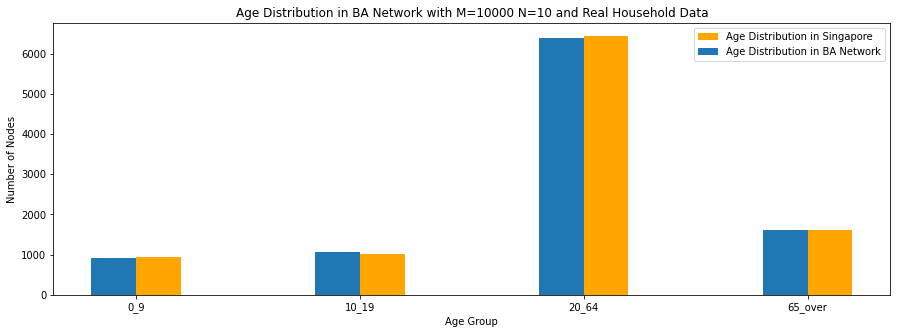

In [73]:
figure(figsize=(15,5))

X_axis = np.arange(len(cnter2))
trying = list(cnter.values())
trying[1],trying[2] = trying[2],trying[1]


plt.bar(X_axis+0.1,cnter2.values(),0.2,color='orange',label="Age Distribution in Singapore")
plt.bar(X_axis-0.1,trying,0.2,label="Age Distribution in BA Network")

plt.xticks(X_axis, cnter2)
plt.xlabel("Age Group")
plt.ylabel("Number of Nodes")
plt.title("Age Distribution in BA Network with M=10000 N=10 and Real Household Data")
plt.legend()
plt.show()